<p align="center">
  <img src="https://media.istockphoto.com/vectors/realistic-pink-ribbon-breast-cancer-awareness-symbol-isolated-on-vector-id849443826?k=6&m=849443826&s=612x612&w=0&h=p-icj9BbMMsSS9Vb4cV5dDYQ4n_z5N_67cLOqhfcQug=" width="30%" height="30%" />
</p>

<h1 align="center">Breast Cancer Analysis</h1>






Breast cancer is the most common cause of cancer deaths in women. However, it is a type of cancer that can be treated when diagnosed early. The aim of this study is to identify cancer early in life by using machine learning methods. For this purpose we worked on the *Wisconsin Diagnostic Breast Cancer (WDBC)* dataset, implementing some classification algorithms: Logistic Regression, Support Vector Machine (SVM), Naive Bayes, Decision Tree, Random Forest, Extra Tree and k-Nearest Neighborhood.

The dataset is from the *University Hospital of California* and can be downloaded both from UCI Machine Learning Repository and Kaggle. It consists of 569 samples and 33 features, computed from a digitized image of a fine needle aspiration (FNA) of a breast mass and related to some characteristics of each cell nucleus (e.g. radius, texture, perimeter, area etc.).
Some of these features are more selective and decisive than others and the determination of these features significantly increases the success of the models, reason why Feature Selection is applied to select them. Finally, there are 212 Malignant and 357 Benign out of the 569 breast cancer data in the dataset. The following figures show an example of them:

<center><img src="https://miro.medium.com/max/1838/0*b10UHrarzk6D1oXy.png" width="50%" height="50%"/>

# 1- Loading and Preprocessing Data

## 1.0 Loading Data

If you run it on Colab:

In [ ]:
# !pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


In [ ]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 18.1MB/s]


In [ ]:
!unzip -q breast-cancer-wisconsin-data.zip

In [ ]:
import pandas as pd
breast_cancer = pd.read_csv("/content/data.csv")
breast_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


If you run it on your Jupyter Notebook:

In [ ]:
import pandas as pd
breast_cancer = pd.read_csv("path/dataset.csv")
breast_cancer

In [ ]:
print('The shape of the Wisconsin Breast Cancer Dataset is {}'.format(breast_cancer.shape))

The shape of the Wisconsin Breast Cancer Dataset is (569, 33)


This dataset is composed by 569 observations and 33 columns.

The features are computed from a digitized image of a fine needle aspiration (FNA) of a breast mass and describe characteristics of the cell nuclei present in the image.


We can see them in more details:
- 1) ID number 
- 2) Diagnosis (M = malignant; B = benign)

Ten real-valued features are computed for each cell nucleus:
  - a) radius (mean of distances from center to points on the perimeter)
  - b) texture (standard deviation of gray-scale values)
  - c) perimeter
  - d) area
  - e) smoothness (local variation in radius lengths)
  - f) compactness (perimeter^2 / area - 1.0)
  - g) concavity (severity of concave portions of the contour)
  - h) concave points (number of concave portions of the contour)
  - i) symmetry
  - j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" (namely, "largest": mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.


All feature values are recoded with four significant digits.

In [ ]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## 1.1 Preprocessing Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Check for **Missing Values**:

In [ ]:
breast_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

As we can see, no variable has missing values, except the last one, *Unnamed: 32*, which, instead, contains only null values, reason why we can remove it from the dataset.

We remove also the *id* variable , because it is not useful for the purposes of our analysis.

In [ ]:
breast_cancer = breast_cancer.drop(["id", "Unnamed: 32"], 1)
breast_cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Check for **Outliers**:

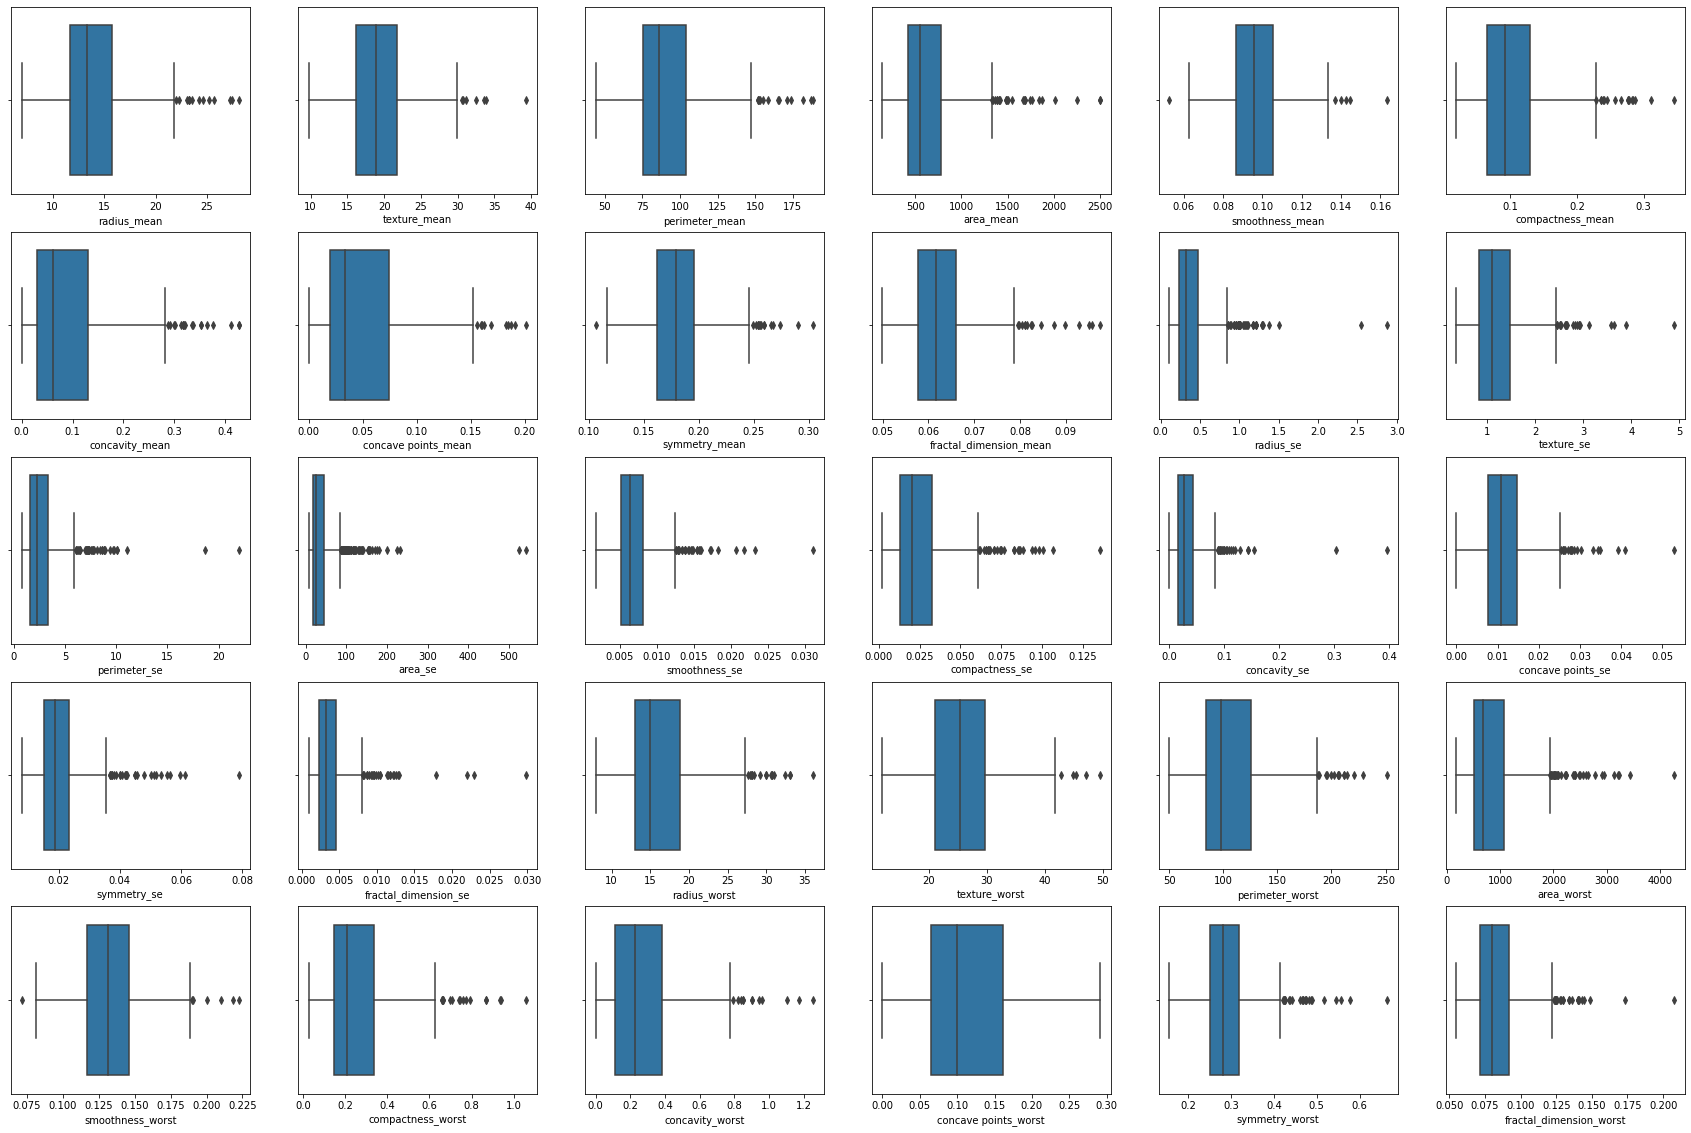

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # mask warnings

n_rows  = 5
n_cols  = 6
count   = 0
col_num = 1 # start with 1, because we are not interested in column 0, which is the target variable

plt.subplots(n_rows, n_cols, figsize=(30,20))
for i in range(n_rows):
    for j in range(n_cols):
        plt.subplot(n_rows, n_cols, count+1,)
        sns.boxplot(breast_cancer.iloc[:, col_num])
        if col_num < breast_cancer.shape[1] :
            count   += 1
            col_num += 1

plt.show()

As we can see from the boxplots, most of the variables have outliers. They may have significant effect on the outcome of tumor being Benign or Malignant and, in order to decide to remove or to keep them, we should have a strong knowledge about features. Therefore, we think it is important to keep them, as they could be significant for classification purposes.

Look at some **statistics**:

In [ ]:
summary_stats = breast_cancer.describe()
sum_stats = summary_stats.transpose()         # in order to have statistics as columns
sum_stats = sum_stats.drop(["count"], axis=1) # remove the count column, which is added with the transposition, because it is unuseful
sum_stats

,mean,std,min,25%,50%,75%,max
radius_mean,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


We clearly see that **area_mean** and **smoothness_mean** are not on the same scale. 

It is well known that machine learning algorithms do not converge well when facing unscaled features, reason why we'll standardize the data.

Look at the **target variable**:

In [ ]:
# Check how many malignant and benign tumors are there:
malignant = sum(breast_cancer["diagnosis"]=="M")
print("The number of malignant tumors is", malignant)

benign = sum(breast_cancer["diagnosis"]=="B")
print("The number of benign tumors is", benign)

The number of malignant tumors is 212
The number of benign tumors is 357


In [ ]:
# Replace values of the target variable:
breast_cancer['diagnosis']= breast_cancer['diagnosis'].replace('M', 1)
breast_cancer['diagnosis']= breast_cancer['diagnosis'].replace('B', 0)
breast_cancer["diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

Now our target variable assumes values 0 or 1: 
- 0 if the tumor is Benign;
- 1 if the tumor is Malignant. 

Check for **data imbalance**:

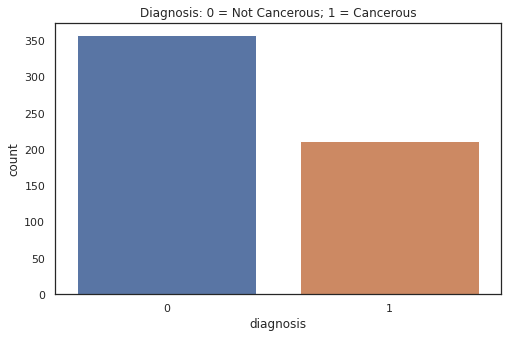

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style="white")
ax = sns.countplot(x="diagnosis", data=breast_cancer)
plt.title("Diagnosis: 0 = Not Cancerous; 1 = Cancerous")
plt.show()

As we can see from the plot, the dataset is unbalanced. This could be a problem in the classification phase, since the probability of instances belonging to the majority class is significantly high, hence the algorithms are much more likely to classify new observations to the majority class. So, we have to handle this matter in the next phases of the analysis.

## 1.2 Exploratory Data Analysis

Let's have a look at the distribution of our data!

In [ ]:
subdata = breast_cancer.drop(['diagnosis'], axis=1) # we want to plot all the variables except "diagnosis"

In [ ]:
num_var = [i for i in subdata.columns] # this is needed for the following plots
print(num_var)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


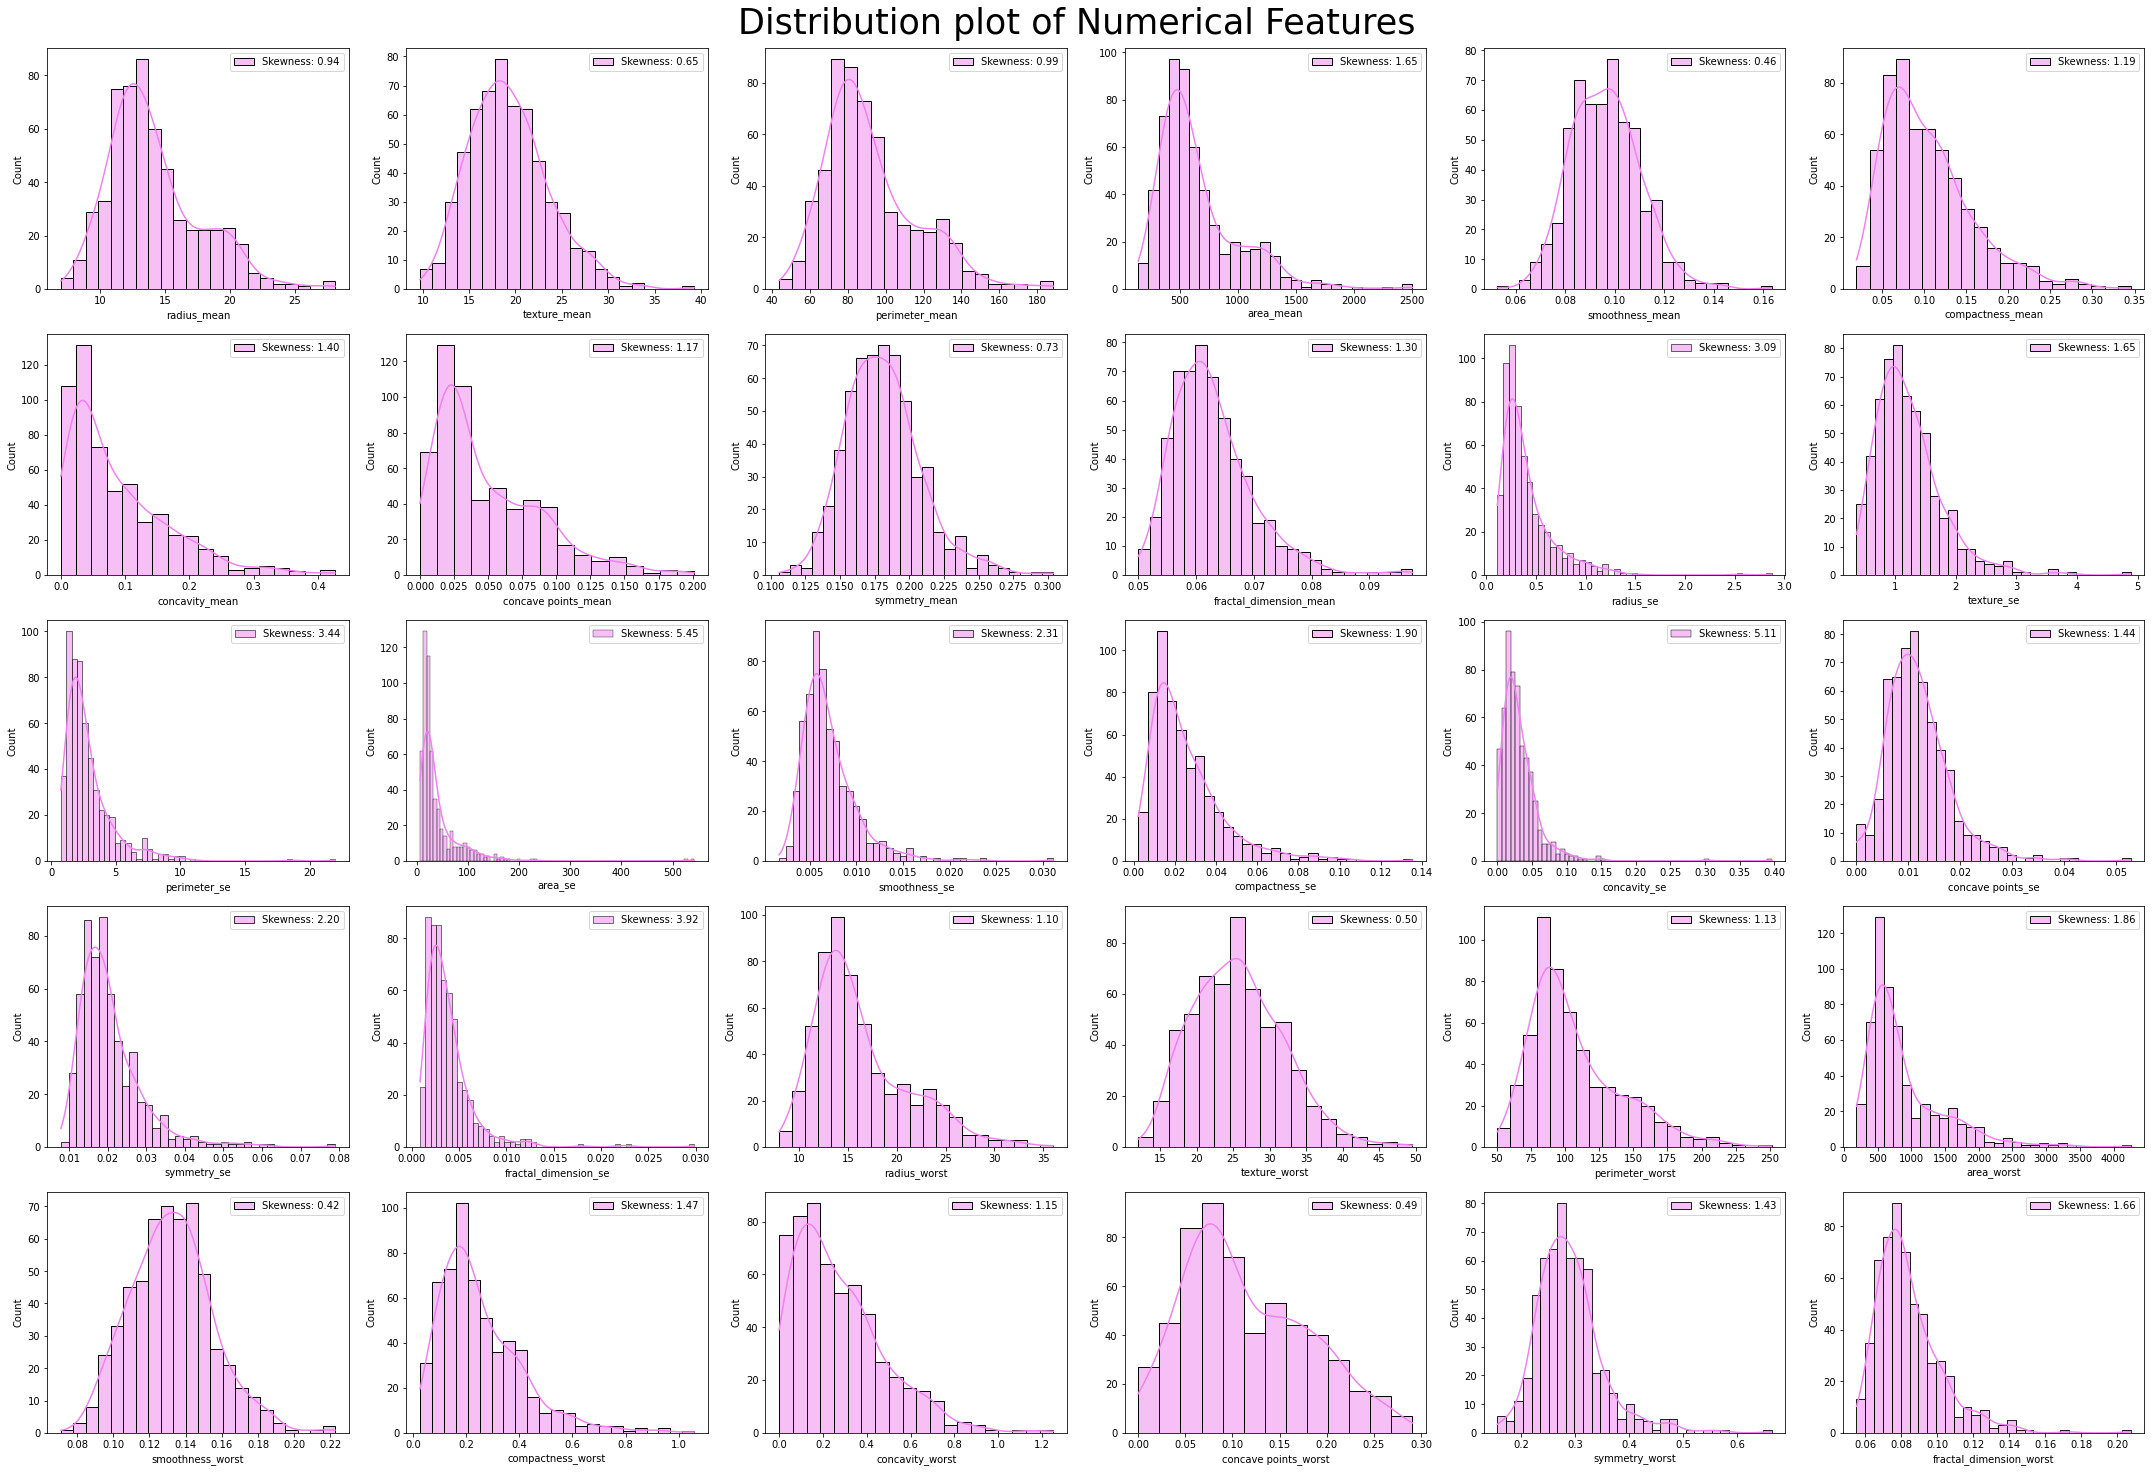

In [ ]:
plt.figure(figsize=(30,20))

for index, feature in enumerate(num_var): # create a loop in order to fill the grid with plots
  plt.subplot(5,6,index+1) # we get plots arranged in 5 rows and 6 columns; 
                           # index+1 because index starts at 1 in the upper left corner 
                           # and increases to the right.
  g = sns.histplot(subdata[feature], kde=True, label= 'Skewness: {:.2f}'.format(subdata[feature].skew()), color="violet")
  plt.legend(loc='best') # plot the skewness value
  plt.suptitle('Distribution plot of Numerical Features', size=35).set_position([.5, 1.02])
  plt.tight_layout() # automatically adjust the layout 

Here we can see the distribution of the numerical features of our dataset and the value of the skewness.

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.

For a unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right. If, instead, the value is zero value means that the tails on both sides of the mean balance out overall; this is the case for a symmetric distribution.


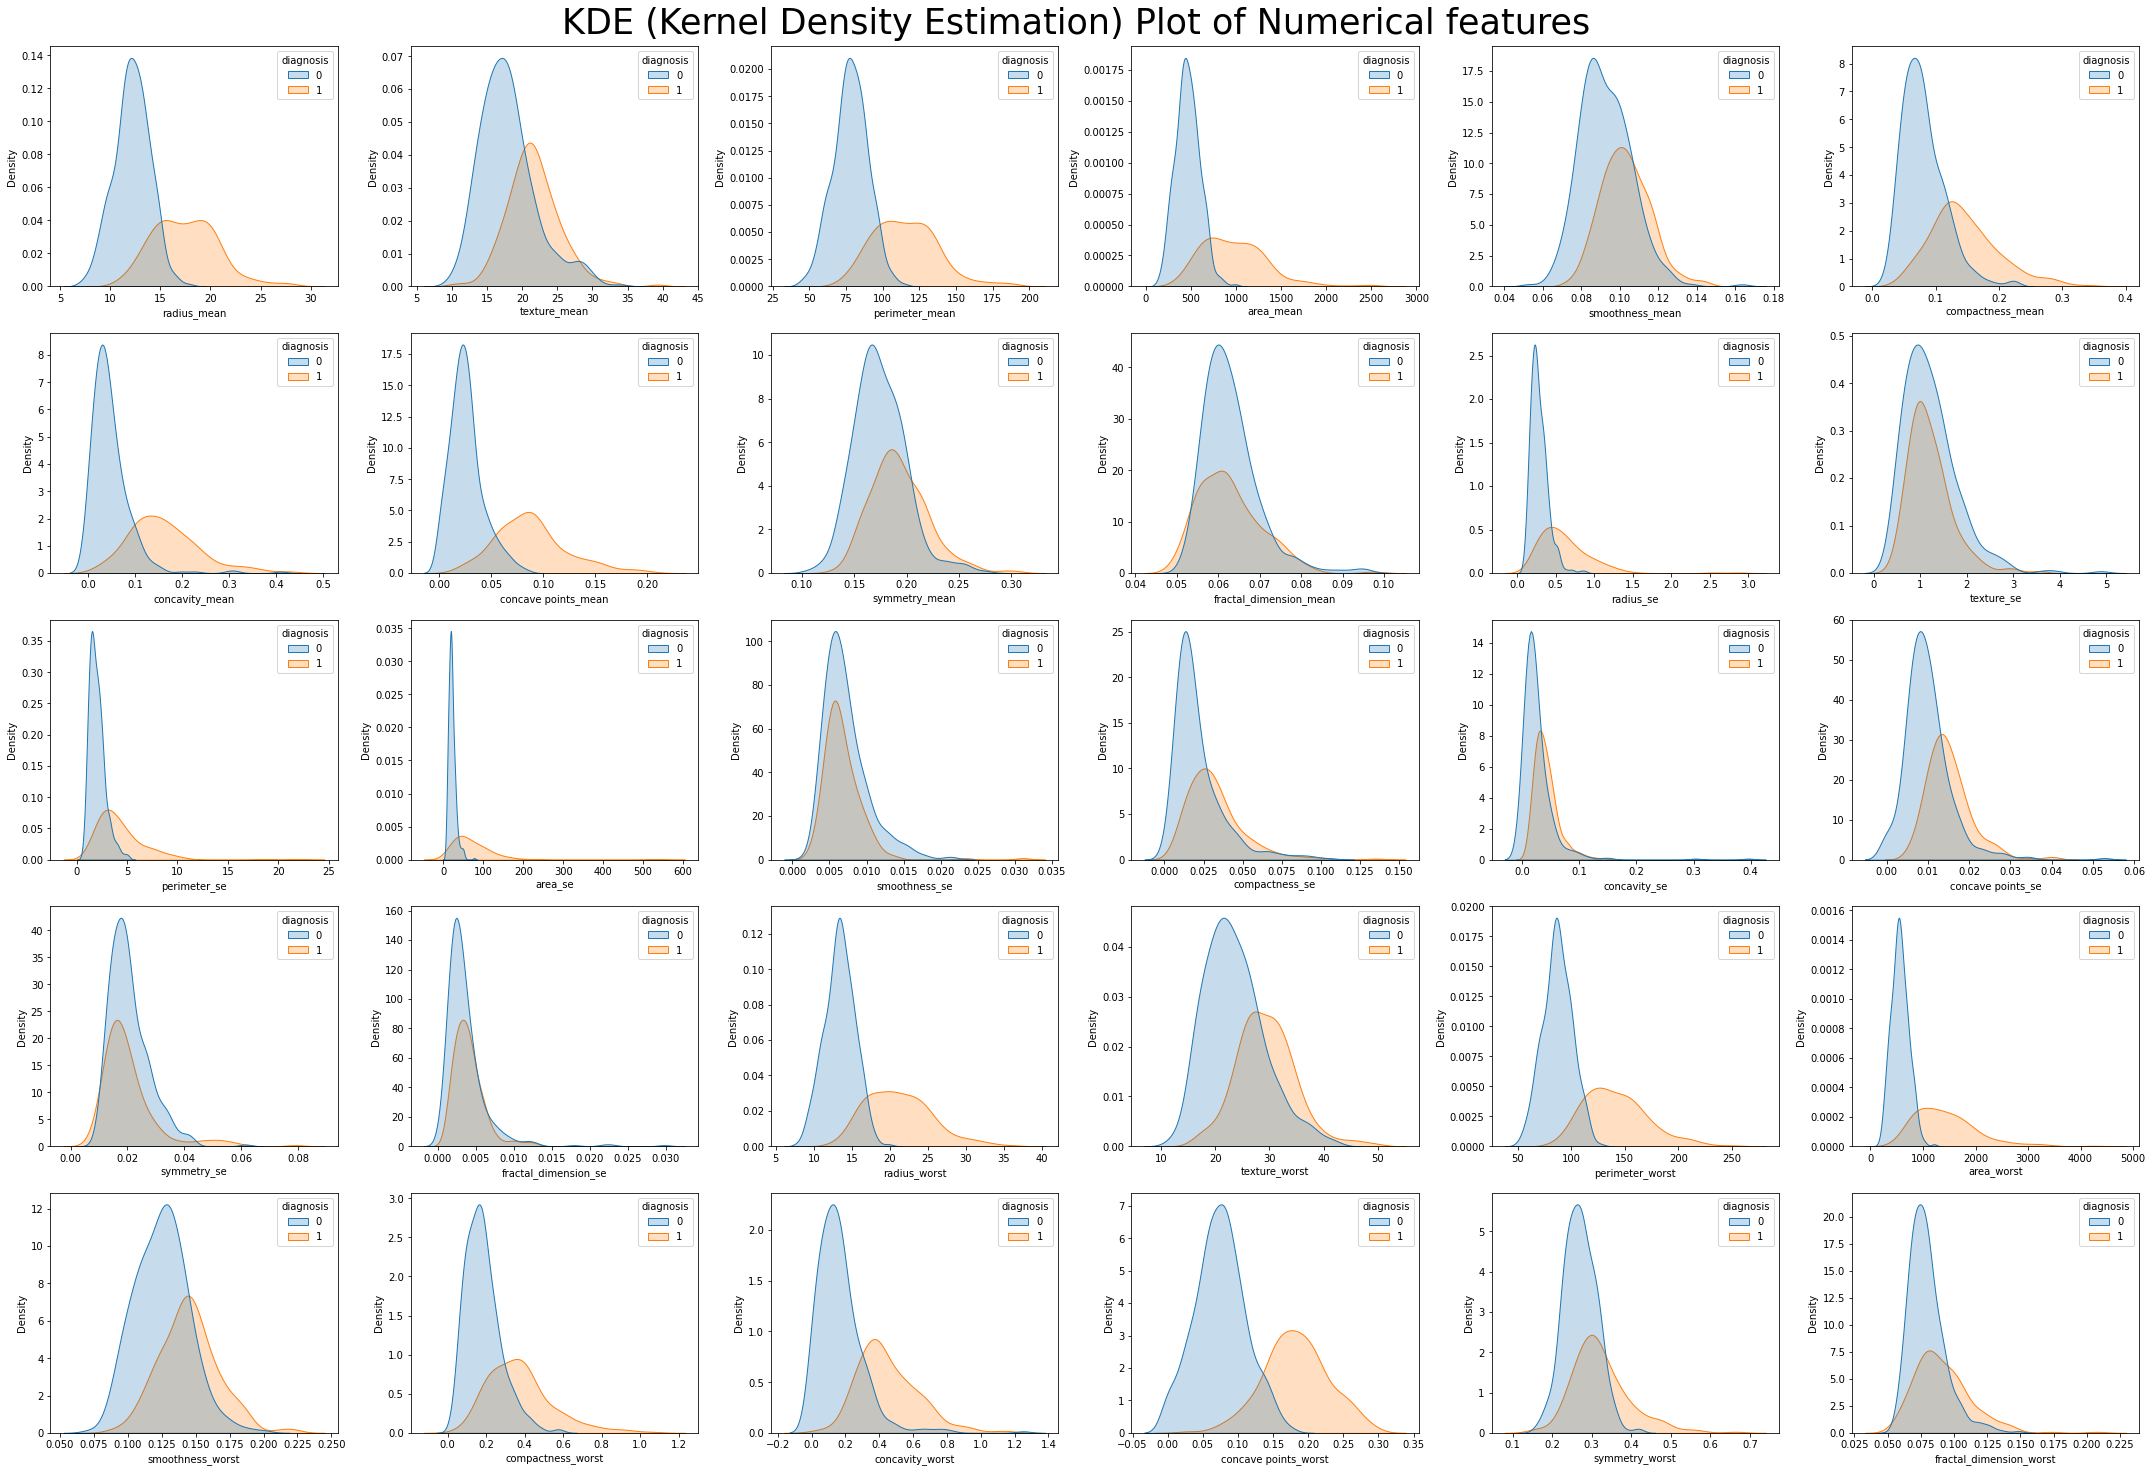

In [ ]:
plt.figure(figsize=(30,20))

for index, feature in enumerate(num_var): # create a loop in order to fill the grid with plots
  plt.subplot(5,6,index+1) # we get plots arranged in 5 rows and 6 columns; 
                           # index+1 because index starts at 1 in the upper left corner 
                           # and increases to the right.
  g = sns.kdeplot(data=breast_cancer, x=feature, hue='diagnosis', shade=True) 
  # hue: semantic variable mapped to determine colors of plot elements                                            
  plt.suptitle('KDE (Kernel Density Estimation) Plot of Numerical features', size=35).set_position([.5, 1.02])
  plt.tight_layout() # automatically adjust the layout 

This is a kernel density estimate (KDE) plot, which is a method for visualizing the distribution of observations in a dataset. It is analogous to a histogram, but, while the latter aims to approximate the underlying probability density function that generated the data by binning and counting observations, KDE presents a different solution to the same problem: rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate.

As we can see, many of the variables have distinct distributions from Benign to Malignant so we could think that these are going to be relevant variables.
On the other hand, those variables with almost the same distribution in Benign and Malignant probably won't be as much important as others are. 

This is the reason why we are going to implement the feature selection.


## 1.3 Feature Selection

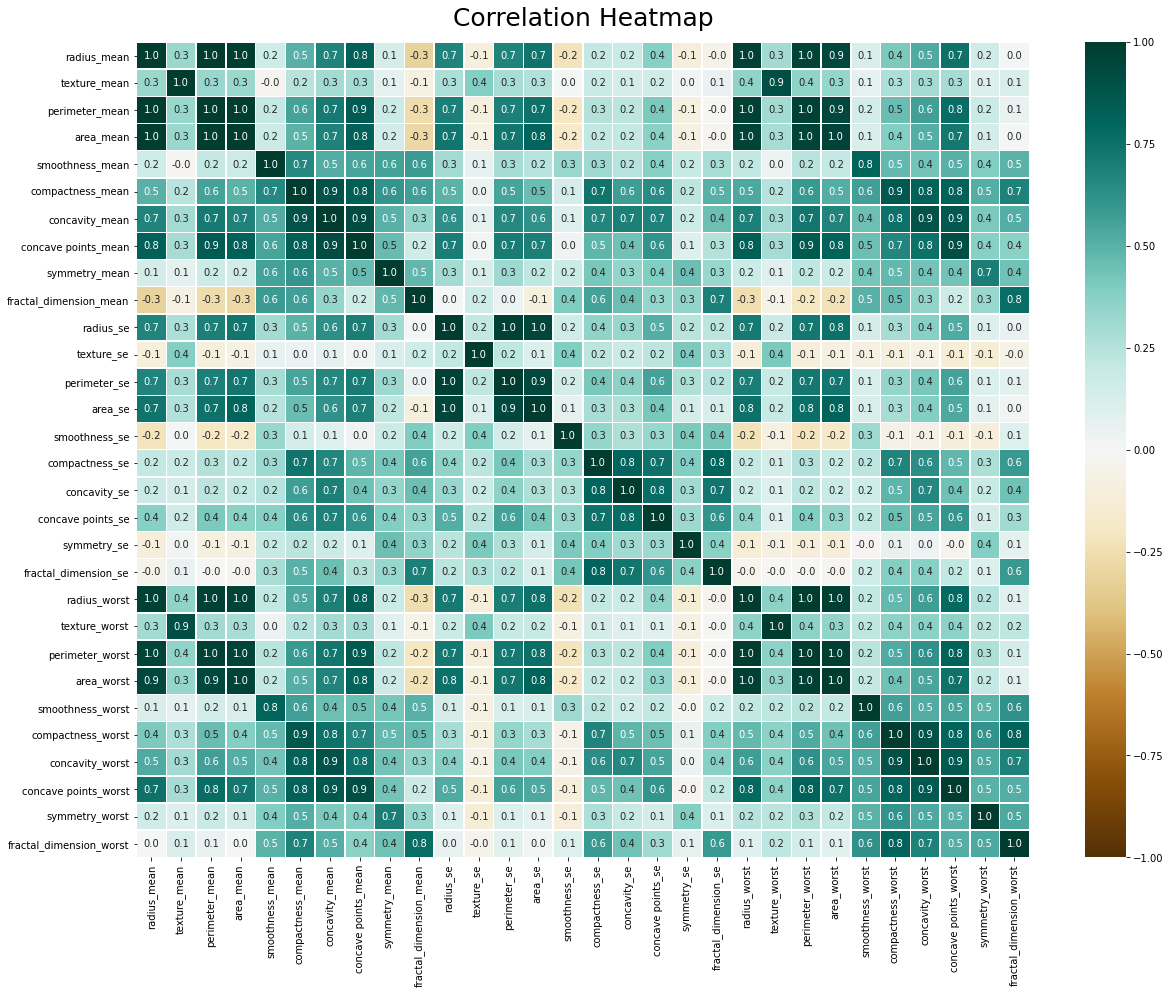

In [ ]:
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(subdata.corr(), vmin=-1, vmax=1, annot=True, linewidths=.5, cmap='BrBG', fmt='.1f')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':25}, pad=16);

Basically, if two features are highly correlated with each other (linear correlation close to 1) it could be a good choice to drop one of them.

As we can see from the correlation matrix:

**radius_mean**, **perimeter_mean** and **area_mean** are correlated with each other -> we choose *area_mean*. Empirically, if we had to give a stronger guess, we would say that experimental measures on area might have lower uncertainties than measures of radius or perimeter. Another criterion to choose area_mean, backed up by data this time, is that the feature seems to express more differences between malignant and benign tumors on KDE plot. 
Based on these arguments, we also decide for the other variables.

**Compactness_mean**, **concavity_mean** and **concave points_mean** are correlated -> choose *concavity_mean*.

**radius_se**, **perimeter_se** and **area_se** are correlated -> choose *area_se*.

**radius_worst**, **perimeter_worst** and **area_worst** are correlated -> choose *area_worst*.

**Compactness_worst**, **concavity_worst** and **concave points_worst** are correlated -> choose *concavity_worst*.

**Compactness_se**, **concavity_se** and **concave points_se** are correlated -> choose *concavity_se*.

**texture_mean** and **texture_worst** are correlated -> choose *texture_mean*.

**area_worst** and **area_mean** are correlated -> choose *area_mean*.

In [ ]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se',
             'perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst',
             'compactness_se','concave points_se','texture_worst','area_worst']

data = subdata.drop(drop_list,axis = 1 )  
data

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.30010,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.16220,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.08690,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.12380,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.19740,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.14440,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.24140,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.20980,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.19800,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.13740,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.24390,0.1726,0.05623,1.2560,158.70,0.010300,0.05198,0.01114,0.004239,0.14100,0.4107,0.2060,0.07115
565,28.25,1261.0,0.09780,0.14400,0.1752,0.05533,2.4630,99.04,0.005769,0.03950,0.01898,0.002498,0.11660,0.3215,0.2572,0.06637
566,28.08,858.1,0.08455,0.09251,0.1590,0.05648,1.0750,48.55,0.005903,0.04730,0.01318,0.003892,0.11390,0.3403,0.2218,0.07820
567,29.33,1265.0,0.11780,0.35140,0.2397,0.07016,1.5950,86.22,0.006522,0.07117,0.02324,0.006185,0.16500,0.9387,0.4087,0.12400


After dropping highly (linearly) correlated features, we end up with 16 features, almost uncorrelated between each other, as we can see from the following heatmap:



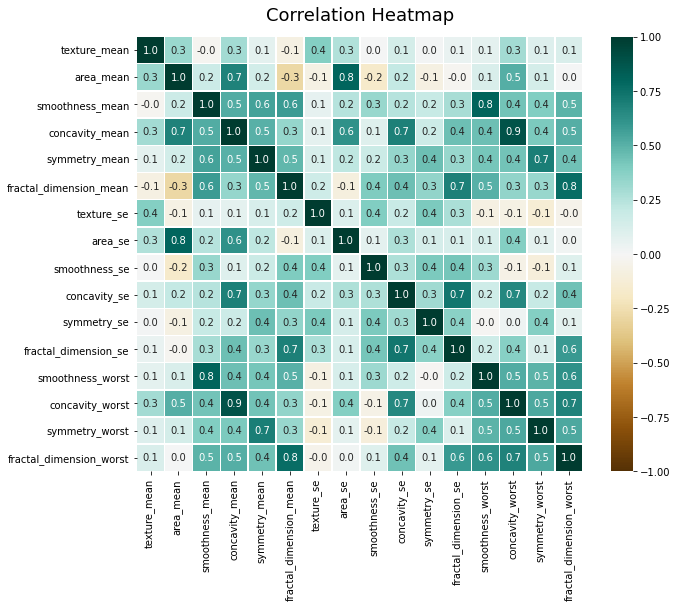

In [ ]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, linewidths=.5, cmap='BrBG', fmt='.1f')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## 1.4 Standardizing Data

In [ ]:
# Standardize data in order to have mean=0 and sdv=1:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_std = scaler.fit_transform(data)
data_std= pd.DataFrame(data_std, columns = data.columns)

In [ ]:
data_std

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,-2.073335,0.984375,1.568466,2.652874,2.217515,2.255747,-0.565265,2.487578,-0.214002,0.724026,1.148757,0.907083,1.307686,2.109526,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.023846,0.001392,-0.868652,-0.876244,0.742402,-0.605351,-0.440780,-0.805450,-0.099444,-0.375612,-0.146749,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.363478,0.939685,-0.398008,-0.780083,1.181336,-0.297005,0.213076,0.237036,0.293559,0.527407,0.854974,1.152255,0.201391
3,0.253732,-0.764464,3.283553,1.915897,2.867383,4.910919,-0.110409,-0.288378,0.689702,0.819518,4.732680,2.047511,3.394275,1.989588,6.046041,4.935010
4,-1.151816,1.826229,0.280372,1.371011,-0.009560,-0.562450,-0.790244,1.190357,1.483067,0.828471,-0.361092,0.499328,0.220556,0.613179,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.041842,1.947285,-0.312589,-0.931027,0.071025,2.604187,1.086384,0.666001,-1.138416,0.167980,0.378365,0.664512,-1.360158,-0.709091
565,2.085134,1.723842,0.102458,0.693043,-0.217664,-1.058611,2.260938,1.291565,-0.424010,0.252202,-0.189161,-0.490556,-0.691230,0.236573,-0.531855,-0.973978
566,2.045574,0.577953,-0.840484,0.046588,-0.809117,-0.895587,-0.257371,0.180698,-0.379342,0.510827,-0.891416,0.036727,-0.809587,0.326767,-1.104549,-0.318409
567,2.336457,1.735218,1.525767,3.296944,2.137194,1.043695,0.686088,1.009503,-0.173000,1.302285,0.326634,0.904057,1.430427,3.197605,1.919083,2.219635


In [ ]:
sum_stat = data_std.describe()
sum_stat = sum_stat.transpose()        
sum_stat = sum_stat.drop(["count"], axis=1)
sum_stat

,mean,std,min,25%,50%,75%,max
texture_mean,1.049736e-16,1.00088,-2.229249,-0.725963,-0.104636,0.584176,4.651889
area_mean,-1.900452e-16,1.00088,-1.454443,-0.667195,-0.295187,0.363507,5.250529
smoothness_mean,1.490704e-16,1.00088,-3.112085,-0.710963,-0.034891,0.636199,4.770911
concavity_mean,-1.338511e-16,1.00088,-1.114873,-0.743748,-0.342240,0.526062,4.243589
symmetry_mean,2.081912e-16,1.00088,-2.744117,-0.703240,-0.071627,0.530779,4.484751
fractal_dimension_mean,5.408679e-16,1.00088,-1.819865,-0.722639,-0.178279,0.470983,4.910919
texture_se,-9.912009e-17,1.00088,-1.554264,-0.694809,-0.197498,0.466552,6.655279
area_se,-1.088760e-16,1.00088,-0.737829,-0.494754,-0.347783,0.106773,11.041842
smoothness_se,4.426014e-16,1.00088,-1.776065,-0.624018,-0.220335,0.368355,8.029999
concavity_se,1.678017e-16,1.00088,-1.057501,-0.557161,-0.199065,0.336752,12.072680


# 2- Supervised Learning

Supervised Learning is a machine learning technique in which the algorithms are designed to learn by example. In fact, the training data consist of inputs paired with the correct outputs. During training the algorithm will search for patterns in the data that correlate with the desired outputs. After training the algorithm will take in new unseen inputs and will determine which label the new inputs will be classified as, based on prior training data. The objective of a supervised learning model is to predict the correct label for newly presented input data.

We are going to implement the following supervised algorithms:
* Logistic Regression
* SVM
* Gaussian Naive Bayes
* Decision Tree
* Random Forest
* Extra Tree
* KNN

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
seed = 100

## Split the data

Let's look at the data we are going to use:

In [ ]:
data_std # most important numerical features

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,-2.073335,0.984375,1.568466,2.652874,2.217515,2.255747,-0.565265,2.487578,-0.214002,0.724026,1.148757,0.907083,1.307686,2.109526,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.023846,0.001392,-0.868652,-0.876244,0.742402,-0.605351,-0.440780,-0.805450,-0.099444,-0.375612,-0.146749,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.363478,0.939685,-0.398008,-0.780083,1.181336,-0.297005,0.213076,0.237036,0.293559,0.527407,0.854974,1.152255,0.201391
3,0.253732,-0.764464,3.283553,1.915897,2.867383,4.910919,-0.110409,-0.288378,0.689702,0.819518,4.732680,2.047511,3.394275,1.989588,6.046041,4.935010
4,-1.151816,1.826229,0.280372,1.371011,-0.009560,-0.562450,-0.790244,1.190357,1.483067,0.828471,-0.361092,0.499328,0.220556,0.613179,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.041842,1.947285,-0.312589,-0.931027,0.071025,2.604187,1.086384,0.666001,-1.138416,0.167980,0.378365,0.664512,-1.360158,-0.709091
565,2.085134,1.723842,0.102458,0.693043,-0.217664,-1.058611,2.260938,1.291565,-0.424010,0.252202,-0.189161,-0.490556,-0.691230,0.236573,-0.531855,-0.973978
566,2.045574,0.577953,-0.840484,0.046588,-0.809117,-0.895587,-0.257371,0.180698,-0.379342,0.510827,-0.891416,0.036727,-0.809587,0.326767,-1.104549,-0.318409
567,2.336457,1.735218,1.525767,3.296944,2.137194,1.043695,0.686088,1.009503,-0.173000,1.302285,0.326634,0.904057,1.430427,3.197605,1.919083,2.219635


In [ ]:
y1 = breast_cancer.iloc[:,0]
y1 # target variable

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_std, y1, test_size = 0.2, stratify=y1, random_state = seed)

# Some classification problems can exhibit a large imbalance in the distribution of the target classes.
# For instance, there could be several times more negative samples than positive samples. 
# In such cases it is recommended to use stratified sampling to ensure that relative class frequencies
# is approximately preserved in each train and validation fold.

In [ ]:
test_mal = sum(y_test==1)
print("The number of malignant tumors is", test_mal)

test_ben = sum(y_test==0)
print("The number of benign tumors is", test_ben)

The number of malignant tumors is 42
The number of benign tumors is 72


In [ ]:
accuracy_list = []

## 2.1 Logistic Regression

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. 
It transforms its output using the logistic (sigmoid) function (which can assume values between 0 and 1) to return a probability value.

In [ ]:
log_reg = LogisticRegression(solver='lbfgs') # avoid the generation of a FutureWarning about the solver argument
log_reg.fit(x_train, y_train)                # train the model
log_reg_pred = log_reg.predict(x_test)       # compute predictions
log_reg_acc = log_reg.score(x_test, y_test)  # compare actual values and predicted ones to see the accuracy (in test) of the model
accuracy_list.append(100*log_reg_acc)        # compute the percentage value of the accuracy

print("Accuracy of Logistic Regression is:", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is: 95.61%


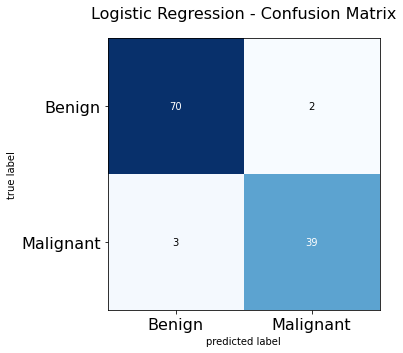

In [ ]:
cm = confusion_matrix(y_test, log_reg_pred)
plot_confusion_matrix(cm, figsize=(8,5), hide_ticks=True, cmap=plt.cm.Blues)
sns.set(font_scale=2.0)
plt.title("Logistic Regression - Confusion Matrix", fontsize=16)
plt.xticks(range(2), ["Benign","Malignant"], fontsize=16)
plt.yticks(range(2), ["Benign","Malignant"], fontsize=16)

plt.show()

The trace of the matrix gives us the total of right classified units, therefore:
- 70 tumors are correctly classified as benign;
- 39 tumor are correctly classified as malignant.


## 2.2 SVM

SVM algorithm is based on the idea of finding a hyperplane that best separates the features of one class from the others, i.e. the one which separates the classes being the farthest from the training observations, which is measured by the margin. This algorithm allows for some observations to be on the incorrect side of the margin or in the incorrect side of the hyperplane, defining a “soft” margin, in order to classify data even if they are not linearly separable.

In [ ]:
sv_clf = SVC(gamma="auto")

sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = sv_clf.score(x_test, y_test)
accuracy_list.append(100* sv_clf_acc)

print("Accuracy of SVM is:", "{:.2f}%".format(100* sv_clf_acc))

Accuracy of SVM is: 97.37%


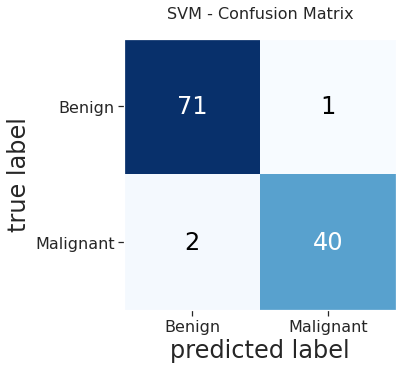

In [ ]:
cm = confusion_matrix(y_test, sv_clf_pred)
plot_confusion_matrix(cm, figsize=(8,5), hide_ticks=True, cmap=plt.cm.Blues)
sns.set(font_scale=2.0)
plt.title("SVM - Confusion Matrix", fontsize=16)
plt.xticks(range(2), ["Benign","Malignant"], fontsize=16)
plt.yticks(range(2), ["Benign","Malignant"], fontsize=16)
plt.show()

Classification:
- 71 tumors are correctly classified as benign;
- 40 tumor are correctly classified as malignant.

## 2.3 Gaussian Naive Bayes

Naive Bayes algorithms assume that features are independent of each other and there is no correlation between them (this is the reason why the algorithm is called *naive*), but this is not the case in real life, reason why this could lead to  less accurate predictions.

Gaussian Naive Bayes algorithm is used with continuous data that follow a Gaussian normal distribution.

In [ ]:
gnb_clf = GaussianNB()
gnb_clf.fit(x_train, y_train)
gnb_pred = gnb_clf.predict(x_test)
gnb_acc = gnb_clf.score(x_test, y_test)
accuracy_list.append(100*gnb_acc)

print("Accuracy of Gaussian Classifier is:", "{:.2f}%".format(100* gnb_acc))

Accuracy of Gaussian Classifier is: 95.61%


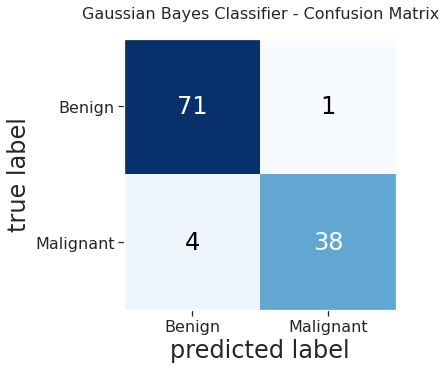

In [ ]:
cm = confusion_matrix(y_test, gnb_pred)
plot_confusion_matrix(cm, figsize=(8,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Gaussian Bayes Classifier - Confusion Matrix", fontsize=16)
plt.xticks(range(2), ["Benign","Malignant"], fontsize=16)
plt.yticks(range(2), ["Benign","Malignant"], fontsize=16)
plt.show()

Classification:
- 71 tumors are correctly classified as benign;
- 38 tumor are correctly classified as malignant.

## 2.4 Decision Tree

DTs are ML algorithms that progressively divide datasets into smaller data groups based on a descriptive feature, until they reach sets that are small enough to be described by some label.

DTs are composed of nodes, branches and leafs. Each **node** represents a *feature*; each **branch** represents a *rule* (or decision); each **leaf** represents an *outcome*. The **depth** of a Tree is defined by the number of nodes, not including the root node.

In [ ]:
dt_clf = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=seed)
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = dt_clf.score(x_test, y_test)
accuracy_list.append(100*dt_acc)

print("Accuracy of Decision Tree Classifier is:", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is: 92.11%


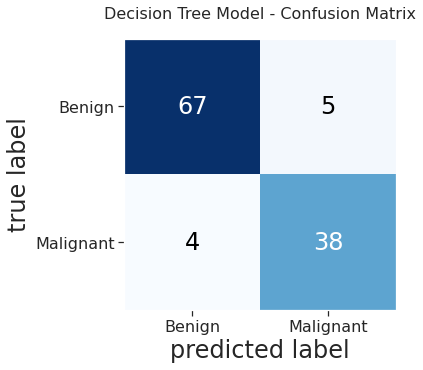

In [ ]:
cm = confusion_matrix(y_test, dt_pred)
plot_confusion_matrix(cm, figsize=(8,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix", fontsize=16)
plt.xticks(range(2), ["Benign","Malignant"], fontsize=16)
plt.yticks(range(2), ["Benign","Malignant"], fontsize=16)
plt.show()

Classification:
- 67 tumors are correctly classified as benign;
- 38 tumor are correctly classified as malignant.

## 2.5 Random Forest 

Random Forest is an ensemble method. These kind of methods combine different DTs to improve the performance of a single DT, because it can suffer from high variance, which means that a small change in the data can result in a very different set of splits, making interpretation somewhat complex, and bias if some classes dominate over others (this is a problem in unbalanced datasets).

Random Forest is an extension over Bagging, which aims to reduce the variance of a DT creating in parallel random subsets of the training data (where any observation has the same probability to appear in a new subset data) and also taking a random selection of features rather than using all features to grow DTs. Next, each collection of subset data is used to train DTs, resulting in an ensemble of different DTs. Finally, an average of all predictions of those different DTs is used, which produces a more robust performance than single DTs. 

In [ ]:
r_clf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=seed)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = r_clf.score(x_test, y_test)
accuracy_list.append(100*r_acc)

print("Accuracy of Random Forest Classifier is:", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is: 96.49%


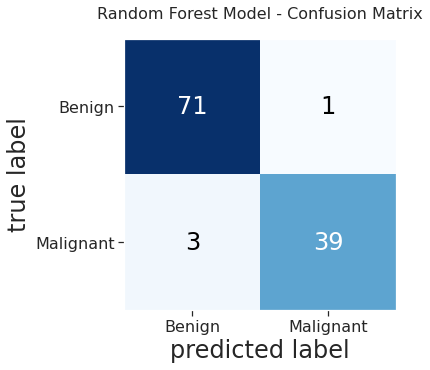

In [ ]:
cm = confusion_matrix(y_test, r_pred)
plot_confusion_matrix(cm, figsize=(8,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix", fontsize=16)
plt.xticks(range(2), ["Benign","Malignant"], fontsize=16)
plt.yticks(range(2), ["Benign","Malignant"], fontsize=16)
plt.show()

Classification:
- 71 tumors are correctly classified as benign;
- 39 tumor are correctly classified as malignant.

## 2.6 Extra Tree

Extra Tree, also known as *Extremely Randomized Tree*, is an algorithm similar to the Random Forest one, from which differs, however, in the fact that it uses the whole original sample as opposed to subsampling the data as Random Forest does. Another difference is in how the nodes are split. While Random Forest is built to always choose the best possible split, Extra Tree chooses random splits, adding one further step of randomization.

In [ ]:
ex_clf = ExtraTreesClassifier(n_estimators=100, criterion='gini', random_state=seed)
ex_clf.fit(x_train, y_train)
ex_pred = ex_clf.predict(x_test)
ex_acc = ex_clf.score(x_test, y_test)
accuracy_list.append(100*ex_acc)

print("Accuracy of Extra Trees Classifier is:", "{:.2f}%".format(100* ex_acc))

Accuracy of Extra Trees Classifier is: 97.37%


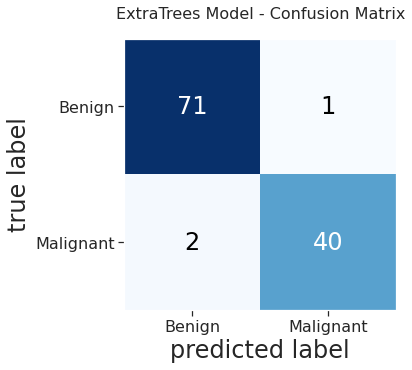

In [ ]:
cm = confusion_matrix(y_test, ex_pred)
plot_confusion_matrix(cm, figsize=(8,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("ExtraTrees Model - Confusion Matrix", fontsize=16)
plt.xticks(range(2), ["Benign","Malignant"], fontsize=16)
plt.yticks(range(2), ["Benign","Malignant"], fontsize=16)
plt.show()

Classification:
- 71 tumors are correctly classified as benign;
- 40 tumor are correctly classified as malignant.

## 2.7 K-Nearest Neighbors

The KNN algorithm assumes that similar units are close to each other. Determine the class of a data point based on the majority voting principle: if k is set to 5, the classes of the 5 closest points w.r.t. the one taken into account are checked and the prediction is made according to the majority class.



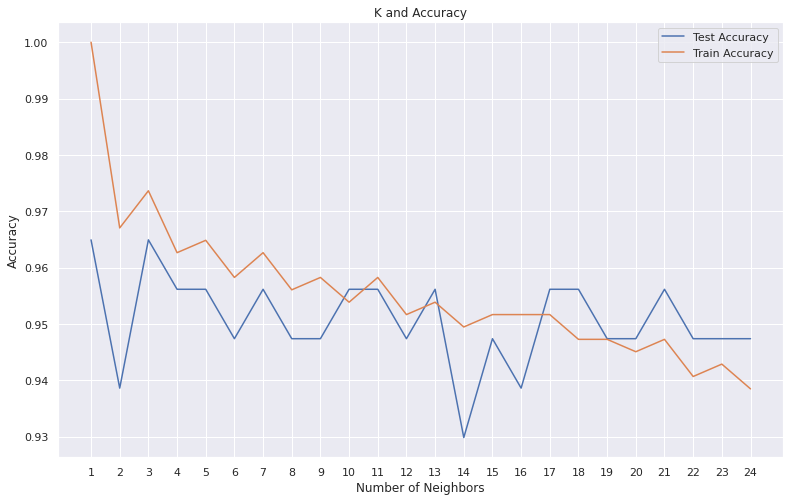

Maximum accuracy: 0.9649122807017544 at K = 1


In [ ]:
# Search for the optimal number of neighbours for k-Nearest:
neighbors = np.arange(1, 25) 
train_accuracy, test_accuracy = list(), list()

# for all the 1-25 values of neighbors instantiate and fit the model and then compute the scores
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))
    
sns.set(font_scale= 1.0)
plt.figure(figsize=[13, 8])
plt.plot(neighbors, test_accuracy, label="Test Accuracy")
plt.plot(neighbors, train_accuracy, label="Train Accuracy")
plt.legend()
plt.title("K and Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xticks(neighbors)
plt.show()


print("Maximum accuracy:", max(test_accuracy), "at K =", 1 + test_accuracy.index(max(test_accuracy))) 
# +1 because otherwise we could have k=0

Although the highest test accuracy results in correspondence of k=1, we note that it corresponds also to a training accuracy equal to 1, which implies the model to overfit. Therefore, we prefer to implement the algorithm with k=3, in corrispondence of which the test accuracy is always 96.49%.

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train, y_train)
knn_pred = knn_clf.predict(x_test)
knn_acc = knn_clf.score(x_test, y_test)
accuracy_list.append(100*knn_acc)

print("Accuracy of KNN Classifier is:", "{:.2f}%".format(100* knn_acc))

Accuracy of KNN Classifier is: 96.49%


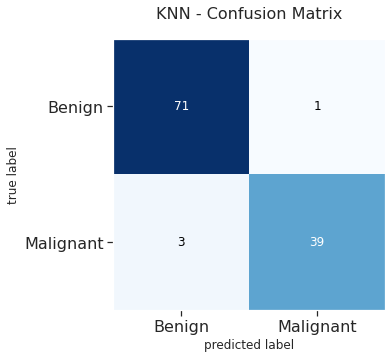

In [ ]:
cm = confusion_matrix(y_test, knn_pred)
plot_confusion_matrix(cm, figsize=(8,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("KNN - Confusion Matrix", fontsize=16)
plt.xticks(range(2), ["Benign","Malignant"], fontsize=16)
plt.yticks(range(2), ["Benign","Malignant"], fontsize=16)
plt.show()

Classification:
- 71 tumors are correctly classified as benign;
- 439 tumor are correctly classified as malignant.

## Models Comparison

In [ ]:
print(accuracy_list)

[95.6140350877193, 97.36842105263158, 95.6140350877193, 92.10526315789474, 96.49122807017544, 97.36842105263158, 96.49122807017544]


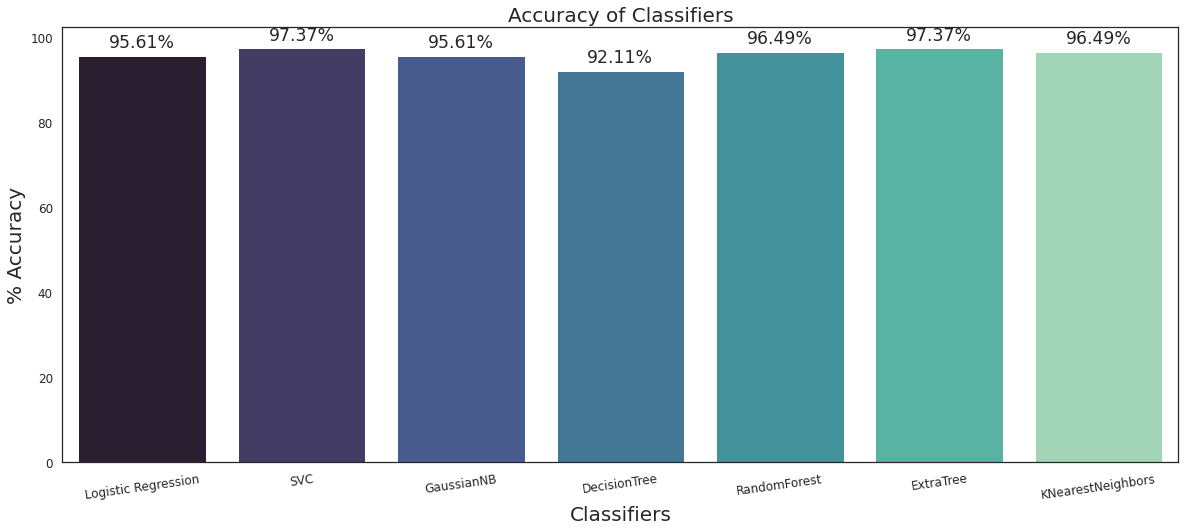

In [ ]:
model_list = ["Logistic Regression", "SVC", "GaussianNB", "DecisionTree", "RandomForest", "ExtraTree", "KNearestNeighbors"]

plt.rcParams['figure.figsize']=20,8
sns.set_style('white')
ax = sns.barplot(x = model_list, y = accuracy_list, palette = "mako") 

plt.xlabel('Classifiers', fontsize = 20 )
plt.ylabel('% Accuracy', fontsize = 20)
plt.title('Accuracy of Classifiers', fontsize = 20)

plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')

plt.show()

As we can see SVC and Extra Tree have the same accuracy: 97.37%.

## SMOTE

When the dataset is imbalanced - as in this case- models could become biased towards selecting the majority group. This is the reason why we are going to implement the **Synthetic Minority Over-sampling technique** which creates new data instances of the minority groups by copying existing minority instances and making small changes to them.  

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # mask warnings

# We want to see how our model will perform on real data and not on the synthetic data that we create.
# This means that we can only add the synthetic data to the training set:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=seed)
x_train_SMOTE, y_train_SMOTE = smt.fit_sample(x_train, y_train)

In [ ]:
# Check how many malignant and benign tumors are there BEFORE oversampling:
malignant_smote = sum(y_train==1)
print("The number of malignant tumors is", malignant_smote)

benign_smote = sum(y_train==0)
print("The number of benign tumors is", benign_smote)

The number of malignant tumors is 170
The number of benign tumors is 285


In [ ]:
# Check how many malignant and benign tumors are there NOW:
malignant_smote = sum(y_train_SMOTE==1)
print("The number of malignant tumors is", malignant_smote)

benign_smote = sum(y_train_SMOTE==0)
print("The number of benign tumors is", benign_smote)

The number of malignant tumors is 285
The number of benign tumors is 285


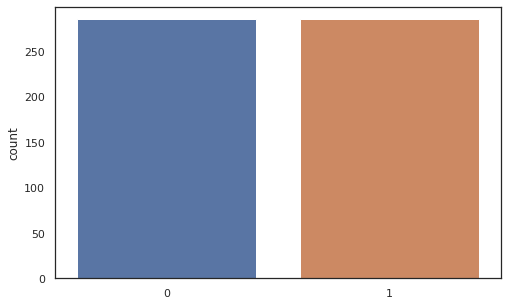

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(y_train_SMOTE)

Now data is balanced!

In [ ]:
accuracy_list_smote = []

### 2.1 Logistic Regression

In [ ]:
log_reg_smote = LogisticRegression(solver='lbfgs')

log_reg_smote.fit(x_train_SMOTE, y_train_SMOTE)                
log_reg_pred_smote = log_reg_smote.predict(x_test)      
log_reg_acc_smote = log_reg_smote.score(x_test, y_test)  
accuracy_list_smote.append(100*log_reg_acc_smote)      

print("Accuracy of Logistic Regression SMOTE is:", "{:.2f}%".format(100* log_reg_acc_smote))

Accuracy of Logistic Regression SMOTE is: 96.49%


### 2.2 SVM

In [ ]:
sv_clf_smote = SVC(gamma="auto")

sv_clf_smote.fit(x_train_SMOTE, y_train_SMOTE)
sv_clf_pred_smote = sv_clf_smote.predict(x_test)
sv_clf_acc_smote  = sv_clf_smote.score(x_test, y_test)
accuracy_list_smote.append(100* sv_clf_acc_smote)

print("Accuracy of SVM SMOTE is:", "{:.2f}%".format(100* sv_clf_acc_smote))

Accuracy of SVM SMOTE is: 98.25%


### 2.3 Gaussian Naive Bayes

In [ ]:
gnb_clf_smote = GaussianNB()

gnb_clf_smote.fit(x_train_SMOTE, y_train_SMOTE)
gnb_pred_smote = gnb_clf_smote.predict(x_test)
gnb_acc_smote = gnb_clf_smote.score(x_test, y_test)
accuracy_list_smote.append(100*gnb_acc_smote)

print("Accuracy of Gaussian Classifier SMOTE is:", "{:.2f}%".format(100* gnb_acc_smote))

Accuracy of Gaussian Classifier SMOTE is: 96.49%


### 2.4 Decision Tree

In [ ]:
dt_clf_smote = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=seed)

dt_clf_smote.fit(x_train_SMOTE, y_train_SMOTE)
dt_pred_smote = dt_clf_smote.predict(x_test)
dt_acc_smote = dt_clf_smote.score(x_test, y_test)
accuracy_list_smote.append(100*dt_acc_smote)

print("Accuracy of Decision Tree SMOTE is:", "{:.2f}%".format(100* dt_acc_smote))

Accuracy of Decision Tree SMOTE is: 92.98%


### 2.5 Random Forest

In [ ]:
r_clf_smote = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=seed)

r_clf_smote.fit(x_train_SMOTE, y_train_SMOTE)
r_pred_smote = r_clf_smote.predict(x_test)
r_acc_smote = r_clf_smote.score(x_test, y_test)
accuracy_list_smote.append(100*r_acc_smote)

print("Accuracy of Random Forest Classifier SMOTE is:", "{:.2f}%".format(100* r_acc_smote))

Accuracy of Random Forest Classifier SMOTE is: 97.37%


### 2.6 Extra Tree

In [ ]:
ex_clf_smote = ExtraTreesClassifier(n_estimators=100, criterion='gini', random_state=seed)

ex_clf_smote.fit(x_train_SMOTE, y_train_SMOTE)
ex_pred_smote = ex_clf_smote.predict(x_test)
ex_acc_smote = ex_clf_smote.score(x_test, y_test)
accuracy_list_smote.append(100*ex_acc_smote)

print("Accuracy of Extra Trees Classifier SMOTE is:", "{:.2f}%".format(100* ex_acc_smote))

Accuracy of Extra Trees Classifier SMOTE is: 99.12%


### 2.7 K-Nearest Neighbors

In [ ]:
knn_smote = KNeighborsClassifier(n_neighbors=3)

knn_smote.fit(x_train_SMOTE, y_train_SMOTE)
knn_pred_smote = knn_smote.predict(x_test)
knn_acc_smote = knn_smote.score(x_test, y_test)
accuracy_list_smote.append(100*knn_acc_smote)

print("Accuracy of KNN Classifier SMOTE is:", "{:.2f}%".format(100* knn_acc_smote))

Accuracy of KNN Classifier SMOTE is: 96.49%


### Models comparison

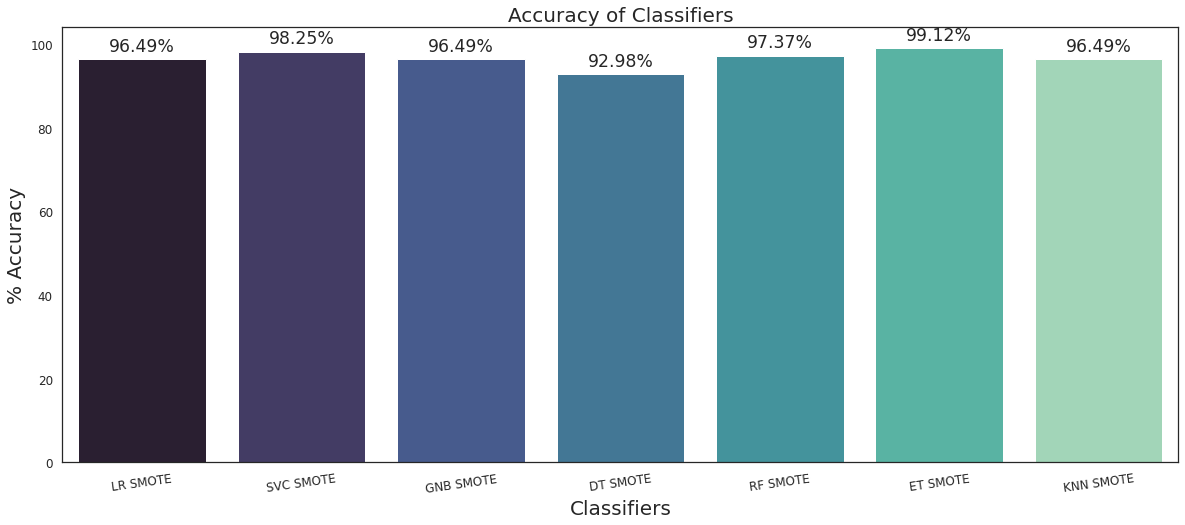

In [ ]:
model_list_smote = ["LR SMOTE", "SVC SMOTE", "GNB SMOTE", "DT SMOTE", "RF SMOTE", "ET SMOTE", "KNN SMOTE"]

plt.rcParams['figure.figsize']=20,8
sns.set_style('white')
ax = sns.barplot(x = model_list_smote, y = accuracy_list_smote, palette = "mako")


plt.xlabel('Classifiers', fontsize = 20 )
plt.ylabel('% Accuracy', fontsize = 20)
plt.title('Accuracy of Classifiers', fontsize = 20)

plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')

plt.show()

## Baseline vs SMOTE models

In [ ]:
final_accuracy_table = {'Classifiers': ['Logistic Regression', 'SVC', 'GaussianNB', 
                                        'DecisionTree', 'RandomForest', 
                                        'ExtraTrees', 'KNearestNeighbors'],
                        
                        'Accuracy_basic': [log_reg_acc, sv_clf_acc, gnb_acc, dt_acc, r_acc, ex_acc, knn_acc],
                        
                        'Accuracy_smote': [log_reg_acc_smote, sv_clf_acc_smote, gnb_acc_smote, 
                                           dt_acc_smote, r_acc_smote, ex_acc_smote, knn_acc_smote]}

final_accuracy_table = pd.DataFrame(final_accuracy_table)   
print(final_accuracy_table)

           Classifiers  Accuracy_basic  Accuracy_smote
0  Logistic Regression        0.956140        0.964912
1                  SVC        0.973684        0.982456
2           GaussianNB        0.956140        0.964912
3         DecisionTree        0.921053        0.929825
4         RandomForest        0.964912        0.973684
5           ExtraTrees        0.973684        0.991228
6    KNearestNeighbors        0.964912        0.964912


Now we can state that the best model to classify tumors into benign or malignant is the **Extra Tree** with the 99% of accuracy. 

Let's have a look at it:

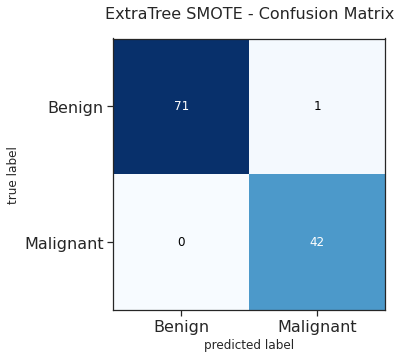

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [ ]:
cm = confusion_matrix(y_test, ex_pred_smote)
plot_confusion_matrix(cm, figsize=(8,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("ExtraTree SMOTE - Confusion Matrix", fontsize=16)
plt.xticks(range(2), ["Benign","Malignant"], fontsize=16)
plt.yticks(range(2), ["Benign","Malignant"], fontsize=16)
plt.show()

print(classification_report(y_test, ex_pred_smote)) # text report showing the main classification metrics

* **TP:** correctly predicted samples having cancerous cells (1 &#8594; 1);
* **TN:** correctly predicted samples not having cancerous cells (0 &#8594; 0); 
* **FP:** incorrectly predicted samples not having cancerous cells (0 &#8594; 1);
* **FN:** incorrectly predicted samples having cancerous cells (1 &#8594; 0).

**Precision:** ability of a classification model to identify only relevant instances (in other words, it expresses the proportion of the data points our model says was relevant actually were relevant). 

**Recall:** ability of a classification model to identify all the data points of interest in a dataset (e.g. malignant tumors).

**F1 score:** single metric combining recall and precision using the harmonic mean (harmonic mean is used instead of a simple average because it punishes extreme values).



$$ \text{Precision} = \frac{TP}{TP + FP} $$ <br />

$$ \text{Recall} = \frac{TP}{TP + FN} $$ <br />

$$ \text{F1} = 2*\frac{\text{precision * recall}}{\text{precision + recall}} $$





# 3- Unsupervised Learning

Unsupervised learning is a machine learning technique in which no labels are given to the learning algorithm, leaving it on its own to find patterns in its input. It can be a goal in itself (discovering hidden patterns in data) or a means towards an end (feature learning -  learn the features and use them to perform a specific task).

Unsupervised learning is mostly used for clustering. Clustering is the act of creating groups with differing characteristics; it attempts to find various subgroups within a dataset. As this is unsupervised learning, we are not restricted to any set of labels and are free to choose how many clusters to create. This is both a blessing and a curse: picking a model that has the correct number of clusters (complexity) has to be conducted via an *empirical* model selection process.

As regard to the clustering algorithms, we are going to implement the following ones:

* K-means
* Hierarchical Clustering

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import completeness_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

seed = 100

Let's start to implement our algorithms and, just to be clear, we are going to use our **data_std** dataset, the standardized one, containing the most relevant features found in the Feature Selection step, except, of course, the target variable, which will be used as external information to compare the clustering results with the actual situation.

In [ ]:
data_std

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,-2.073335,0.984375,1.568466,2.652874,2.217515,2.255747,-0.565265,2.487578,-0.214002,0.724026,1.148757,0.907083,1.307686,2.109526,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.023846,0.001392,-0.868652,-0.876244,0.742402,-0.605351,-0.440780,-0.805450,-0.099444,-0.375612,-0.146749,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.363478,0.939685,-0.398008,-0.780083,1.181336,-0.297005,0.213076,0.237036,0.293559,0.527407,0.854974,1.152255,0.201391
3,0.253732,-0.764464,3.283553,1.915897,2.867383,4.910919,-0.110409,-0.288378,0.689702,0.819518,4.732680,2.047511,3.394275,1.989588,6.046041,4.935010
4,-1.151816,1.826229,0.280372,1.371011,-0.009560,-0.562450,-0.790244,1.190357,1.483067,0.828471,-0.361092,0.499328,0.220556,0.613179,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.041842,1.947285,-0.312589,-0.931027,0.071025,2.604187,1.086384,0.666001,-1.138416,0.167980,0.378365,0.664512,-1.360158,-0.709091
565,2.085134,1.723842,0.102458,0.693043,-0.217664,-1.058611,2.260938,1.291565,-0.424010,0.252202,-0.189161,-0.490556,-0.691230,0.236573,-0.531855,-0.973978
566,2.045574,0.577953,-0.840484,0.046588,-0.809117,-0.895587,-0.257371,0.180698,-0.379342,0.510827,-0.891416,0.036727,-0.809587,0.326767,-1.104549,-0.318409
567,2.336457,1.735218,1.525767,3.296944,2.137194,1.043695,0.686088,1.009503,-0.173000,1.302285,0.326634,0.904057,1.430427,3.197605,1.919083,2.219635


In [ ]:
# y1 = breast_cancer.iloc[:,0]
y1 # target variable

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

##  3.1 K-means

K-means is the most used partitioning algorithm. The procedure follows a simple and easy way to classify *n* units of the dataset into a certain number of K clusters, fixed a priori. The main idea is that the units within the same cluster are as similar as possible, whereas units from different clusters are as dissimilar as possible. 
It does this through an iterative process which aims to minimize an objective function: the within sum of squares , **WSS**: sum of squared Euclidean distances between the points assigned to the cluster and the cluster mean - it is a measure of within cluster dissimilarity, reason why it must be minimized by the algorithm.

This iterative process starts by randomly select k centroids, one for each cluster, which should be placed in a smart way because of different location causes different result (the better choice is to place them as much as possible far away from each other). 

The next step is to take each point belonging to the dataset and associate it to the nearest centroid.  

At this point new centroids are calculated, computing the new mean value of all the data points in the cluster.

This procedure is iterated until the centroids do not change their location anymore or the maximum number of iterations is reached.

Let's have a look at which could be the right number of clusters.


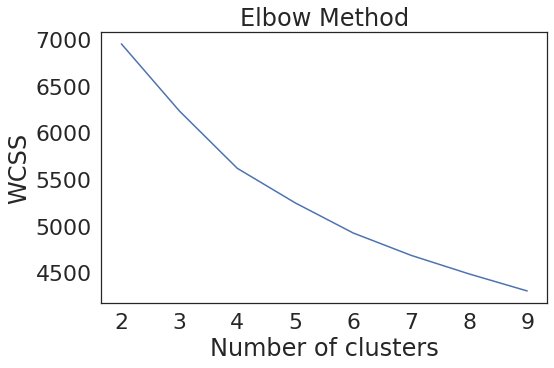

In [ ]:
# Elbow Method:

wcss = [] # create a list into which we store the within cluster sum of squares that is
          # the metric used for k value selection process.

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, n_init = 10, max_iter = 300, random_state = seed).fit(data_std)
    wcss.append(kmeans.inertia_)


sns.set_style('white')
plt.figure(figsize=[8, 5])
plt.plot(range(2, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(2, 10, step=1))
plt.show()

The elbow in the plot is not very clear. We could guess it is in corrispondence of 4, but it's better to try also with the Silhouette Method.

*Silhouette* is a measure of how close each point in one cluster is to points in the neighboring clusters, ranging between [-1, 1].

Silhouette coefficients near **+1** indicate that the sample is far away from the neighboring clusters; value of **0** indicates that the sample is on or very close to the decision boundary between two neighboring clusters; **-1** indicate that those sample might have been assigned to the wrong cluster.

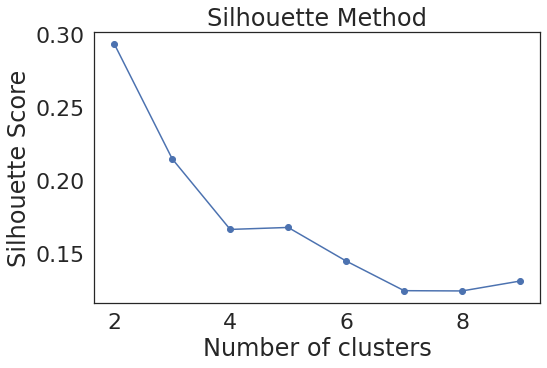

In [ ]:
# Silhouette Method:

sse = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init = 10, max_iter = 300, random_state = seed).fit(data_std)  
    score = silhouette_score(data_std, kmeans.labels_)
    sse.append(score)

sns.set_style('white')
plt.figure(figsize=[8, 5])
plt.plot(range(2,10), sse, marker="o")
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show();

Now the right number of clusters seems to be 2, but let's implement the algorithm both for k=4 and k=2.

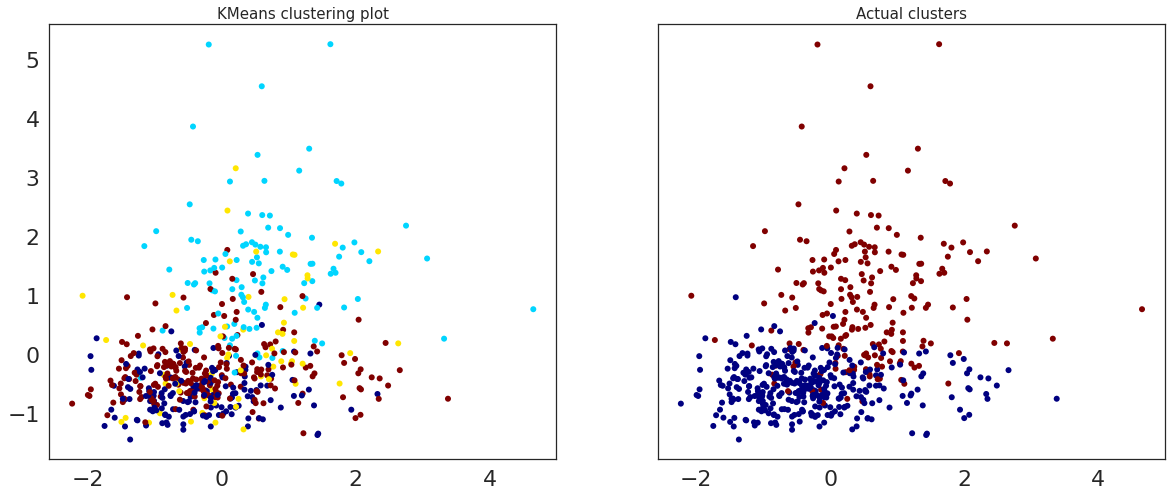

In [ ]:
# k=4 #

# Define the model:
kmeans4 = KMeans(n_clusters = 4, init="k-means++", n_init=10, max_iter=300, random_state = seed) 

# ‘k-means++’ : selects initial centroids in a smart way, namely to speed up convergence
# and avoid the convergence to a local minimum.

# Fit the model:
km_pred4 = kmeans4.fit_predict(data_std)



# Plot the clusters in 2D space:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.set_style('white')

ax1.scatter(data_std.iloc[:,0], data_std.iloc[:,1], c=km_pred4, cmap='jet', edgecolor='None')
ax1.set_title("KMeans clustering plot", fontsize=15)

ax2.scatter(data_std.iloc[:,0], data_std.iloc[:,1], c=y1, cmap='jet', edgecolor='None')
ax2.set_title('Actual clusters', fontsize=15)
plt.show()

As we can see form the "KMeans clustering plot", there is a strong overlapping between the 4 clusters, which means that there are not 4 groups in the data! This is even more clear comparing the plot with the one representing the target variable, *diagnosis*: we can see that it is distributed into 2  clusters (in fact we know that it can assume only 2 values), which are well defined, not overlapped between each other. Therefore, we can state that the data should be clustered into 2 clusters... let's try!

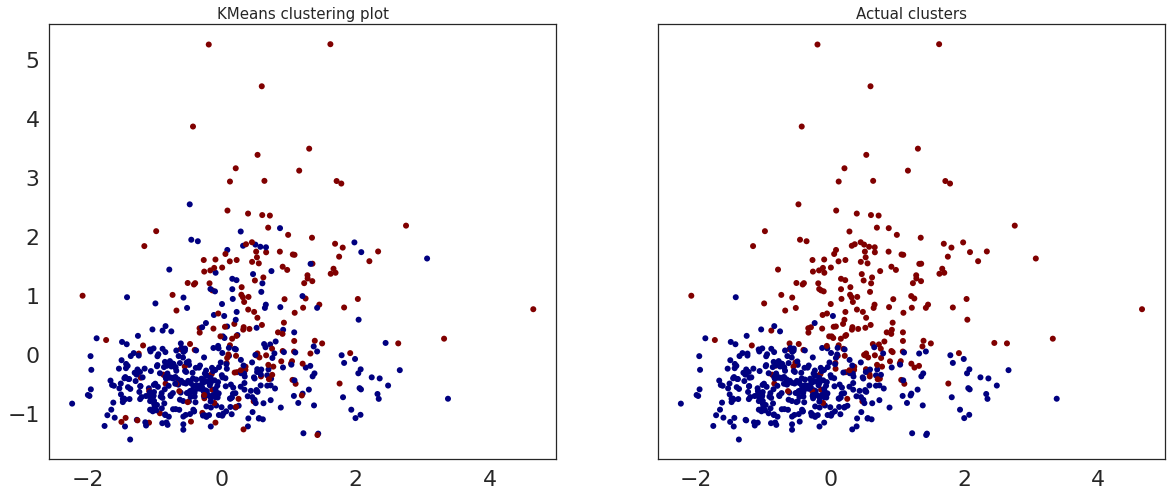

In [ ]:
# k=2 #

# Define the model:
kmeans = KMeans(n_clusters = 2, init="k-means++",  n_init=10, max_iter=300, random_state = seed) 
# ‘k-means++’ : selects initial centroids in a smart way, namely to speed up convergence
# and avoid the convergence to a local minimum.

# Fit the model:
km_pred = kmeans.fit_predict(data_std)



# Scatter plots:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.set_style('white')

ax1.scatter(data_std.iloc[:,0], data_std.iloc[:,1], c=km_pred, cmap='jet', edgecolor='None')
ax1.set_title('KMeans clustering plot', fontsize=15)

ax2.scatter(data_std.iloc[:,0], data_std.iloc[:,1], c=y1, cmap='jet', edgecolor='None')
ax2.set_title('Actual clusters', fontsize=15)
plt.show()

Now, with K=2, there is an improvement in the plot, as the 2 clusters are much less overlapped w.r.t. to the previous 4, and the situation is closer to the actual one. Therefore, we can state that the right number of clusters for K-means is 2.

## 3.2 Hierarchical Clustering

Hierarchical clustering means creating a tree of clusters by iteratively grouping (**agglomerative clustering**) or dividing  (**divisive clustering**) data points. 
These algorithms do not require the number of clusters as input and the cluster hierarchy built by them is displayed by means of **dendrograms**.

*Divisive clustering* is a *top-down* approach and it is not commonly used in real life; *Agglomerative clustering* is the most used and it is a *bottom-up* approach, in which each data point is assumed to be a separate cluster at first, then the similar clusters are iteratively combined.

In order to decide which clusters should be combined or where a cluster should be split, the **linkage criterion** is used: it specifies the dissimilarity of units as a function of the pairwise distances of observations in the sets. We can distinguish between 4 different linkage criterions:

1. **Ward’s linkage:** it minimizes the variance of the clusters being merged - total within-cluster variance/ total sum of squares, TSS. Minimum increase in total within-cluster variance is aimed (this increase is a weighted squared distance between cluster centers - centroids).
2. **Average linkage:** the distance between two clusters is defined as the average of the distances between all observations in the two clusters.
3. **Complete linkage:** the distance between two clusters is defined as the maximum distance between all data points in the two clusters.
4. **Single linkage:** the distance between two clusters is defined as the smallest distance between all data points in the two clusters.

Let's implement the Agglomerative Hierarchical Clustering!




In [ ]:
# Let's find the best parameters:

n_clusters_list = list()

linkage_list = []

distance_list = []

adj_rand_list = list()  # similarity measure between two clusterings by considering all pairs of samples 
                        # and counting pairs that are assigned in the same or different clusters in the 
                        # predicted and true clusterings.



for i in range(2,10):
    for linkage in ['ward', 'complete', 'average', 'single']:
      for distance in ['euclidean', 'manhattan']:
        clustering = AgglomerativeClustering(n_clusters = i, linkage = linkage).fit(data_std)
        n_clusters_list.append(i)
        linkage_list.append(linkage)
        distance_list.append(distance)
        adj_rand_list.append(adjusted_rand_score(y1, clustering.labels_))
        

        
hac_score = {'Number of clusters': n_clusters_list, 'Linkage': linkage_list, 'Distance': distance_list,
             'ARI': adj_rand_list}


hac_score = pd.DataFrame(hac_score)
hac_score.loc[[hac_score["ARI"].idxmax()]]

,Number of clusters,Linkage,Distance,ARI
0,2,ward,euclidean,0.689242


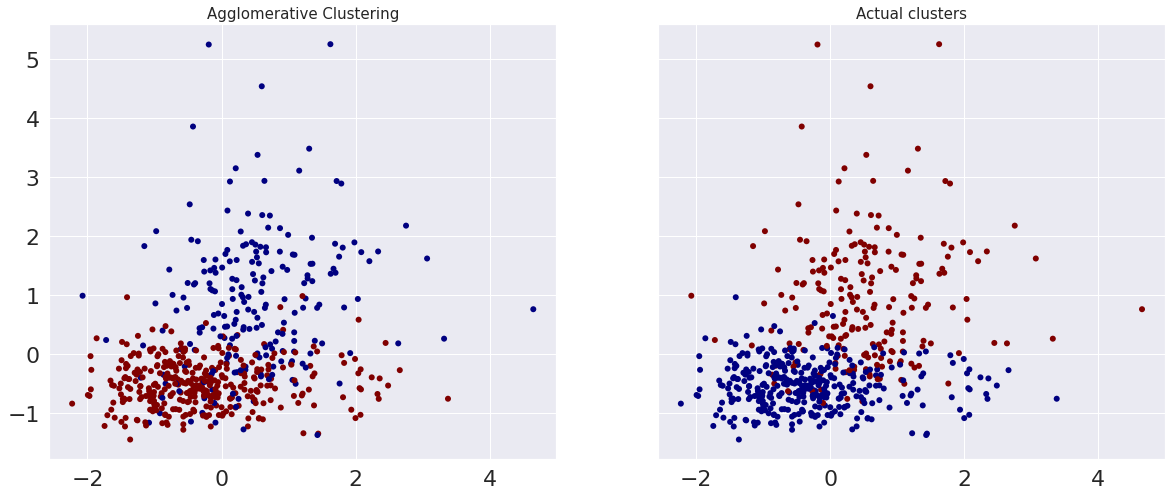

In [ ]:
# Agglomerative Clustering (AC) according to the best value of the Adjusted Rand Index:

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
ac_pred = ac.fit_predict(data_std)

# Scatter plots:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.set_style('white')

ax1.scatter(data_std.iloc[:,0], data_std.iloc[:,1], c=ac_pred, cmap='jet', edgecolor='None', )
ax1.set_title('Agglomerative Clustering', fontsize=15)

ax2.scatter(data_std.iloc[:,0], data_std.iloc[:,1], c=y1, cmap='jet', edgecolor='None')
ax2.set_title('Actual clusters', fontsize=15)
plt.show()

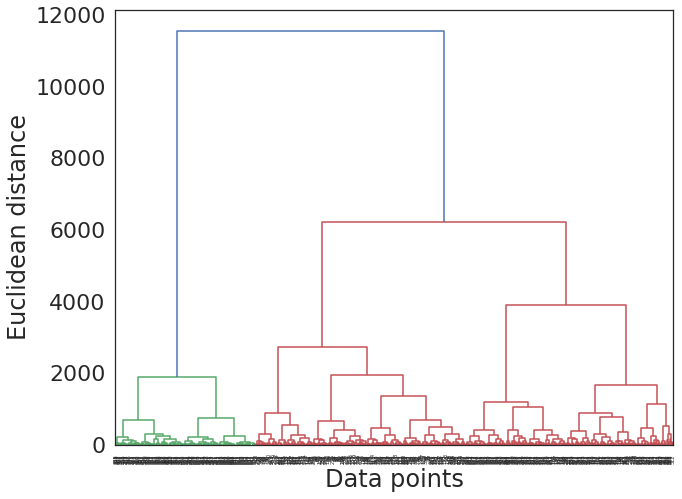

In [ ]:
Z = hierarchy.linkage(ac.children_, 'ward')

plt.figure(figsize=(10,8))
dn = hierarchy.dendrogram(Z)
plt.xlabel("Data points")
plt.ylabel("Euclidean distance")
plt.show()

In the dendrogram displayed above, each leaf corresponds to one object. As we move up the tree, objects that are similar to each other are combined into branches, which are themselves fused at a higher height.

The height of the fusion, provided on the vertical axis, indicates the (dis)similarity/distance between two objects/clusters. The higher the height of the fusion, the less similar the objects are. This height is known as the *cophenetic distance* between the two objects.

## Cluster Validation

Until now, we have examined the distribution of our data in clusters in a 2D space, comparing it with the distribution of our target variable, but we do not know whether these two clusters are actually able to separate the tumor into *benign* and *malignant*. 

To understand this we are going to implement the **External Cluster Validation**, which consists in comparing the results of CA with an externally known results, the class labels in our case. 

Specifically, we are going to look at the **Adjusted Rand Index** and at the **Confusion Matrix**.


### Adjusted Rand Index

The adjusted Rand index is the corrected-for-chance version of the Rand index. More specifically, it is a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
Therefore, it attempts to express what proportion of the cluster assignments is ‘correct’; it is bounded between -1 and 1:
- closer to 1 is good;
- closer to -1 is bad.

In [ ]:
# ARI for Kmeans:
ARI_K = adjusted_rand_score(y1, km_pred)
ARI_K

0.4415117476227047

In [ ]:
# ARI for HAC2
ARI_AC = adjusted_rand_score(y1, ac_pred)
ARI_AC

0.6892424670209109

The Agglomerative Clustering has an ARI higher than the one for K-Means Clustering, reason why we can state that the best clustering algorithm for our data is the former.

### Confusion Matrix

In [ ]:
# Check how many malignant and benign tumors are there:
malignant = sum(breast_cancer["diagnosis"]==1)
print("The number of malignant tumors is", malignant)

benign = sum(breast_cancer["diagnosis"]==0)
print("The number of benign tumors is", benign)

The number of malignant tumors is 212
The number of benign tumors is 357


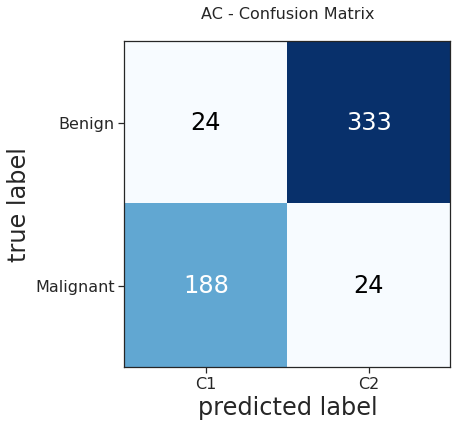

In [ ]:
# Agglomerative Clustering CM:

cm = confusion_matrix(y1, ac_pred)
plot_confusion_matrix(cm, figsize=(10, 6), hide_ticks=True, cmap=plt.cm.Blues)
sns.set(font_scale=2.0)
plt.title("AC - Confusion Matrix", fontsize=16)
plt.xticks(range(2), ["C1","C2"], fontsize=16)
plt.yticks(range(2), ["Benign","Malignant"], fontsize=16)
plt.show()

* Cluster 1 contains:
 - 24 benign tumors (out of 357);
 - 188 malignant tumors (out of 212). 

* Cluster 2 contains:
 - 333 benign tumors (out of 357);
 - 24 malignant tumors (out of 212).

Therefore, according to the Agglomerative Clustering the majority of malignant tumors belong to Cluster 1, while the majority of benign tumors belong to Cluster 2.